# Image Captioning with GloVe and InceptionV3


### 1. Introduction
Generating natural language captions for images combines computer vision and natural language processing. This project aims to automatically describe images using deep learning techniques. Such systems have applications in accessibility (e.g., image descriptions for visually impaired users), content creation, and multimedia analysis.


In [ ]:
# For google colab version
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip
!rm glove.42B.300d.zip

In [19]:
import sys
print(sys.executable)


/usr/local/opt/python@3.10/bin/python3.10


In [20]:
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install requests

  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/23/81/d7eef6a99e42c77f444fdd7bc894b0ceca6c3a95c51239e74a722039521c/charset_normalizer-3.4.0-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/76/c6/c88e154df9c4e1a2a66ccf0005a88dfb2650c1dffb6f5ce603dfbd452ce3/idna-3.10-py3-none-any.whl.metadata
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/ce/d9/5f4c13cecde62396b0d3fe530a50ccea91e7dfc1ccf0e09c228841bb5ba8/urllib3-2.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for certifi>=2017.4.17 from https://files.pythonhosted.org/packages/12/90/3c9ff0512038035f59d279fddeb79f5f1e

### 2. Knowledge

#### 2.1 Computer Vision
- **InceptionV3**:
  - A convolutional neural network pre-trained on the ImageNet dataset.
  - Used as a feature extractor to encode images into high-dimensional vectors.

#### 2.2 Natural Language Processing
- **Word Embeddings (GloVe)**:
  - Pre-trained word vectors capturing semantic relationships between words.
  - Used to initialize the embedding layer for improved language understanding.

- **Sequence Modeling (LSTM)**:
  - Long Short-Term Memory networks handle sequential data and maintain long-term dependencies.
  - Essential for generating coherent captions word by word.

#### 2.3 Encoder-Decoder Architecture
- **Encoder**:
  - InceptionV3 encodes images into fixed-size vectors.
- **Decoder**:
  - LSTM generates captions, predicting one word at a time conditioned on the image and previous words.


In [21]:
# For local version
import os
import requests
import zipfile

# Define URLs and file paths
glove_url = "http://nlp.stanford.edu/data/glove.42B.300d.zip"
zip_file_path = "glove.42B.300d.zip"
extracted_file_path = "glove.42B.300d.txt"

# Download the GloVe embeddings
if not os.path.exists(zip_file_path):
    print("Downloading GloVe embeddings...")
    response = requests.get(glove_url, stream=True)
    with open(zip_file_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Download complete.")
else:
    print("GloVe zip file already exists. Skipping download.")

# Extract the zip file
if not os.path.exists(extracted_file_path):
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(".")
    print("Extraction complete.")
else:
    print("GloVe text file already exists. Skipping extraction.")

# Load GloVe embeddings into memory
print("Loading GloVe embeddings into memory...")
glove_embeddings = {}
with open(extracted_file_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = list(map(float, values[1:]))
        glove_embeddings[word] = vector
print(f"Loaded {len(glove_embeddings)} word vectors.")

# Example usage
word = "example"
if word in glove_embeddings:
    print(f"Embedding for '{word}': {glove_embeddings[word]}")
else:
    print(f"'{word}' not found in GloVe embeddings.")


Download complete.
Extracting GloVe embeddings...
Extraction complete.
Loading GloVe embeddings into memory...
Loaded 1917494 word vectors.
Embedding for 'example': [-0.13427, 0.034675, -0.33406, -0.11325, 0.14436, 0.093146, -3.2316, 1.056, -0.094367, -0.10839, -0.26695, 0.19568, -0.14258, -0.19121, -0.19283, -0.32101, 0.016579, -0.2393, -0.21897, -0.06947, -0.08295, 0.37375, 0.49478, -0.23555, 0.33187, -0.25097, 0.31373, -0.50376, 0.12618, 0.053083, 0.22158, 0.0039218, 0.085776, 0.012354, 0.16938, 0.40647, 0.085727, -0.0091418, 0.23204, 0.32968, -0.17918, 0.095708, -0.25208, -0.085812, -0.016123, 0.22466, 0.29091, 0.09387, 0.57527, -0.36711, -0.16938, 0.08854, 0.19711, 0.093319, -0.09433, 0.16775, -0.36382, 0.097052, -0.19562, 0.09048, -0.088269, -0.38141, -0.33887, 0.40599, 0.1184, 0.21523, -0.24251, -0.29482, -0.029578, -0.10287, 0.24882, 0.060952, 0.10886, 0.23757, -0.093502, -0.14894, -0.083511, 0.047046, 0.065803, -0.033491, -0.085111, -0.65825, -0.19962, -0.50586, 0.10087, -0.02

In [25]:
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install tensorflow


Python(39711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f0/da/f242771de50d12dc1816cc9a66dfa5b377e8cd6ea316a6ffc9a7d2c6dfb8/tensorflow-2.16.2-cp310-cp310-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b

In [27]:
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install pandas
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install numpy

Python(40740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/aa/70/c853aec59839bceed032d52010ff5f1b8d87dc3114b762e4ba2727661a3b/pandas-2.2.3-cp310-cp310-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 217.3 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/a6/ab/7e5f53c3b9d14972843a647d8d7a853969a58aecc7559cb3267302c94774/tzdata-2024.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 11.3 MB/s eta 0:00:00

[notice] A new release of p

Python(40777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


### 3. Dataset Preparation

#### 3.1 Preprocessing
- Images resized to InceptionV3’s input dimensions (299x299).
- Pixel values normalized for efficient processing.
- Captions augmented with `startseq` and `endseq` tokens for sequence modeling.

#### 3.2 Text Cleaning
- Removed punctuation and numbers.
- Converted captions to lowercase.
- Retained words appearing at least 5 times in the dataset.

#### 3.3 Vocabulary
- Constructed a vocabulary from frequently occurring words in captions.


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3 as inception
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import tensorflow.keras.preprocessing.image as tf_image
import pandas as pd
import numpy as np

2024-11-16 01:35:17.955664: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
encode_model = InceptionV3(weights='imagenet')
encode_model = Model(encode_model.input, encode_model.layers[-2].output)
WIDTH = 299
HEIGHT = 299
OUTPUT_DIM = 2048
START = "startseq"
STOP = "endseq"
EPOCHS = 10
preprocess_input = inception.preprocess_input

In [4]:
def encodeImage(img):
  img = img.resize((WIDTH, HEIGHT))
  x = tf_image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  x = encode_model.predict(x) 
  x = np.reshape(x, OUTPUT_DIM )

  return x

In [6]:
img=tf_image.load_img('image_captioning/images/1.jpg', target_size=(299,299))
encodeImage(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([0.36294484, 0.21345317, 0.80201423, ..., 0.3665317 , 0.2238505 ,
       0.50166726], dtype=float32)

In [29]:

data=pd.read_csv('image_captioning/image_caption_map.csv')

In [30]:
data.head(2)

,caption,url,file_name
0,author : a life in photography -- in pictures,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,photograph of the sign being repaired by brave...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg


In [31]:
data['caption']=data['caption'].apply(lambda x:START+' '+x+' '+STOP)

In [32]:
data.shape[0]

1832

### 4. Methodology

#### 4.1 Feature Extraction
- Used **InceptionV3** to extract a fixed-size feature vector (`2048-d`) for each image.

#### 4.2 Caption Generation Model
- **Embedding Layer**:
  - Initialized with pre-trained GloVe embeddings for word representation.
  
- **LSTM-based Decoder**:
  - Takes image features and word embeddings as inputs to generate captions.

#### 4.3 Training
- **Loss Function**:
  - Categorical Cross-Entropy optimized word predictions.
  
- **Batch Processing**:
  - Custom data generator to yield batches of image features, input sequences, and target sequences.


In [34]:
remove_these=[]
encoded_images={}
for i in range(data.shape[0]):
  image_path='image_captioning/images/'+data['file_name'][i]
  print(image_path)
  try:
    img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
    encoded_images[int(data['file_name'][i].split('.')[0])] = encodeImage(img)
  except:
    print('remove: ',i)
    remove_these.append(data['file_name'][i])
# some of the images are not in supported format


image_captioning/images/1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
image_captioning/images/3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
image_captioning/images/4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
image_captioning/images/5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
image_captioning/images/6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
image_captioning/images/7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
image_captioning/images/8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
image_captioning/images/9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
image_captioning/images/11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
image_captioning/images/12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
image_captioning/images/13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
image_captioning/images/14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
image_captioning/images/15.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
image_captioning/images/16.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
image_captioning/images/17.jpg
1/1 ━━

In [35]:
len(remove_these)

42

In [36]:
data=data[-data['file_name'].isin(remove_these)]

In [37]:
data.shape

(1790, 3)

In [38]:
data

,caption,url,file_name
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg
...,...,...,...
1827,startseq person and groom embrace under the ve...,https://static1.squarespace.com/static/564125d...,2082.jpg
1828,startseq a bronze horse head sculpture against...,http://l7.alamy.com/zooms/39b15fd8b3af47bf9a7b...,2084.jpg
1829,startseq use a large mirror to make a small be...,https://cdn.homedit.com/wp-content/uploads/201...,2085.jpg
1830,startseq model and person attend awards endseq,https://media.gettyimages.com/photos/musician-...,2086.jpg


In [39]:
data.reset_index(drop=True,inplace=True)

In [40]:
data['id']=[int(data['file_name'][i].split('.')[0]) for i in range(data.shape[0])]

In [41]:
len(encoded_images)

1790

In [ ]:
# clean up captions

In [50]:
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install nltk



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [73]:
import re
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jingyixu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [74]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
data['caption']=data['caption'].apply(lambda x:re.sub("["+punctuation+"]",' ',x))

In [76]:
data['caption']=data['caption'].apply(lambda x:re.sub("\d",' ',x))

In [77]:
data['caption']=data['caption'].apply(lambda x:re.sub("\s+",' ',x))

In [78]:
data['caption']=data['caption'].str.lower()

In [79]:
data['caption']

0       startseq author a life in photography in pictu...
1       startseq photograph of the sign being repaired...
2       startseq the player staring intently at a comp...
3       startseq globes the green d person carrying in...
4       startseq the bedroom stone cottage can sleep p...
                              ...                        
1785    startseq person and groom embrace under the ve...
1786    startseq a bronze horse head sculpture against...
1787    startseq use a large mirror to make a small be...
1788       startseq model and person attend awards endseq
1789    startseq abstract background laser light multi...
Name: caption, Length: 1790, dtype: object

In [80]:
word_count_threshold = 5
word_counts = {}
for caption in data['caption']:
    for w in word_tokenize(caption):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d ==> %d' % (len(word_counts), len(vocab)))

preprocessed words 3714 ==> 574


In [81]:
caption_lens=[]
for caption in data['caption']:
  words=word_tokenize(caption)
  words=[w for w in words if w in vocab]
  caption_lens.append(len(words))
max_length=max(caption_lens)

In [82]:
idxtoword = {}
wordtoidx = {}

ix = 1
for w in vocab:
    wordtoidx[w] = ix
    idxtoword[ix] = w
    ix += 1

vocab_size = len(idxtoword) + 1
vocab_size

575

In [83]:
max_length=max(caption_lens)

In [84]:
max_length

25

In [85]:

embeddings_index = {}
f = open( 'glove.42B.300d.txt', encoding="utf-8")

for line in f:
    line=line.strip()
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print(f'Found {len(embeddings_index)} word vectors.')

Found 1917494 word vectors.


In [86]:
embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [108]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization,add
from tqdm import tqdm

In [109]:
data.shape

(1790, 4)

In [148]:

def data_generator(data, encoded_images, wordtoidx, max_length, num_photos_per_batch):
    # Initialize lists to store inputs and outputs for the batch
    # x1 - Training data for photos
    # x2 - The caption that goes with each photo
    # y - The predicted rest of the caption
    x1, x2, y = [], [], []
    n = 0  # Counter to track the number of photos processed in the current batch

    while True:
        for k, caption in enumerate(data['caption']):
            photo = encoded_images[data['id'][k]]  # Fetch the encoded photo features
            
            # Convert caption words to their respective indices
            seq = [wordtoidx[word] for word in word_tokenize(caption.lower()) if word in wordtoidx]
            
            # Generate training examples for each caption
            for i in range(1, len(seq)):
                in_seq, out_seq = seq[:i], seq[i]
                
                # Pad input sequence to the maximum length
                in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
                
                # Convert output word index to one-hot encoding
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                
                # Append the photo features, input sequence, and output sequence
                x1.append(photo)
                x2.append(in_seq)
                y.append(out_seq)
                
            # Increment photo counter and check if batch is ready
            n += 1
            if n == num_photos_per_batch:
                # Yield the batch as ([photo_features, input_sequence], target_sequence)
                yield ((np.array(x1), np.array(x2)), np.array(y))
                
                # Reset batch data and counter
                x1, x2, y = [], [], []
                n = 0


In [149]:
len(encoded_images.keys())

1790

In [150]:
data.shape

(1790, 4)

In [126]:
# generator = data_generator(data, encoded_images, wordtoidx, max_length, 1)
# sample = next(generator)
# print(type(sample))
# print(sample)

In [151]:
inputs1 = Input(shape=(OUTPUT_DIM,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [152]:
caption_model.layers[2].set_weights([embedding_matrix])
caption_model.layers[2].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [153]:
number_pics_per_batch = 3
steps = len(data['caption'])//number_pics_per_batch

In [154]:
encoded_images[99].shape

(2048,)

In [155]:
for i in range(EPOCHS*2):
  generator = data_generator(data, encoded_images, wordtoidx, max_length, number_pics_per_batch)
  caption_model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

/usr/local/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_357', 'keras_tensor_360']. Received: the structure of inputs=('*', '*')
  warnings.warn(


596/596 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - loss: 5.0182
596/596 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - loss: 4.4443
596/596 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - loss: 4.1942
596/596 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - loss: 3.9647
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 3.7490
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 3.5524
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 3.3526
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 3.1624
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 2.9884
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 2.8185
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 2.6568
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 2.4972
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 2.3148
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 2.1652
596/596 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 2.0327
596/596 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - loss: 1.9491
596/596 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - loss: 1.8333
596/596 ━━━━━━

In [157]:
caption_model.optimizer.lr = 1e-4
number_pics_per_batch = 6
steps = len(data['caption'])//number_pics_per_batch

for i in tqdm(range(EPOCHS)):
    generator = data_generator(data, encoded_images, wordtoidx, max_length, number_pics_per_batch)
    caption_model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

  0%|          | 0/10 [00:00<?, ?it/s]

298/298 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - loss: 1.6837


 10%|█         | 1/10 [00:23<03:32, 23.65s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 1.5903


 20%|██        | 2/10 [00:44<02:57, 22.18s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 1.5081


 30%|███       | 3/10 [01:05<02:31, 21.66s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 1.5003


 40%|████      | 4/10 [01:27<02:09, 21.51s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 1.4558


 50%|█████     | 5/10 [01:48<01:46, 21.34s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 1.3790


 60%|██████    | 6/10 [02:09<01:25, 21.38s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - loss: 1.3769


 70%|███████   | 7/10 [02:31<01:04, 21.46s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - loss: 1.3515


 80%|████████  | 8/10 [02:52<00:43, 21.53s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - loss: 1.3229


 90%|█████████ | 9/10 [03:14<00:21, 21.59s/it]

298/298 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 1.3033


100%|██████████| 10/10 [03:36<00:00, 21.62s/it]


In [159]:

caption_model.save_weights('caption_model.weights.h5')


In [160]:
def generateCaption(photo):
    in_text = START
    for i in range(max_length):
        sequence = [wordtoidx[w] for w in in_text.split() if w in wordtoidx]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = caption_model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idxtoword[yhat]
        in_text += ' ' + word
        if word == STOP:
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

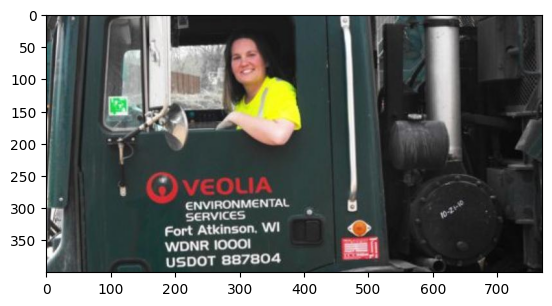

Caption: a standing in a white houses in the


In [163]:
index=5  #79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))


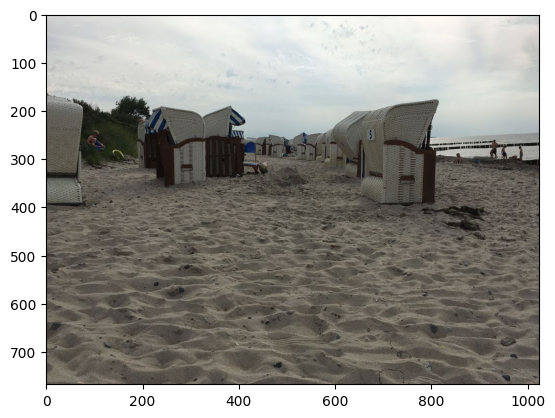

Caption: the sun behind a with a tree


In [165]:
index=287 #79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

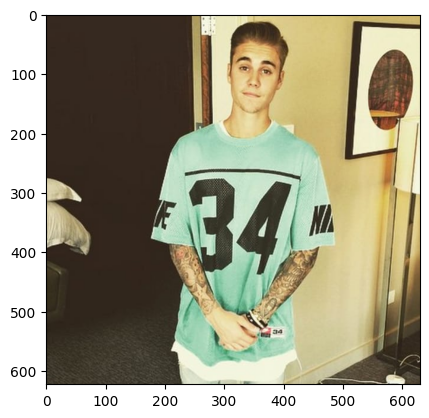

Caption: a model walks the grass during the show


In [168]:
index=185  #79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

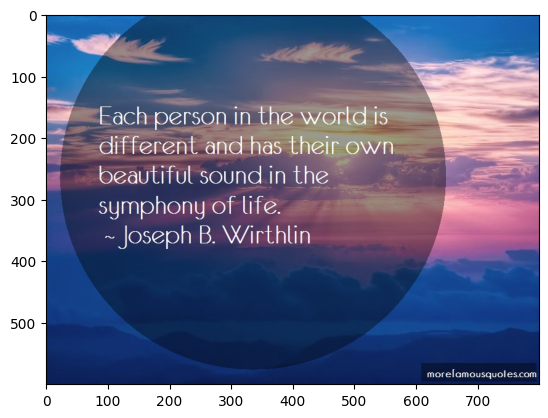

Caption: the sun behind a with a blue sky


In [169]:
index=549  #79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

In [171]:
caption_model.optimizer.lr = 1e-4
number_pics_per_batch = 10
steps = len(data['caption'])//number_pics_per_batch

for i in tqdm(range(EPOCHS)):
    generator = data_generator(data, encoded_images, wordtoidx, max_length, number_pics_per_batch)
    caption_model.fit(generator, epochs=30, steps_per_epoch=steps, verbose=1)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - loss: 1.2922
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - loss: 1.2560
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 1.2303
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 1.2328
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 1.1881
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 1.1441
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - loss: 1.1458
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 1.1247
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - loss: 1.1469
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - loss: 1.1066
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - loss: 1.0924
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - loss: 1.0683
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 1.0551
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - loss: 1.0530
Epoch 15/30
179/179 ━━━━━━━━━

 10%|█         | 1/10 [08:00<1:12:02, 480.31s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.8528
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.8632
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.8429
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.8582
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.8346
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.8396
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.8269
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.8303
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.8313
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.8081
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.8018
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.7948
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.7967
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.8079
Epoch 15/30
179/179 ━━━━━━━━━

 20%|██        | 2/10 [15:48<1:03:04, 473.08s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.7234
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.7238
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.7170
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.6947
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.6967
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.6995
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.6865
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - loss: 0.6778
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - loss: 0.6788
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - loss: 0.6641
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.6768
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.6676
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.6646
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.6576
Epoch 15/30
179/179 ━━━━━━━━

 30%|███       | 3/10 [28:57<1:12:00, 617.26s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.6227
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.6115
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.5996
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.6075
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.5957
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.6005
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.5868
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 0.6007
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.5954
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.5719
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.6031
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 0.5866
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 0.5768
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.5744
Epoch 15/30
179/179 ━━━━━━━━━

 40%|████      | 4/10 [36:30<55:15, 552.65s/it]  

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.5387
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.5337
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.5324
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - loss: 0.5383
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.5400
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.5265
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.5289
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.5211
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.5057
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - loss: 0.5199
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - loss: 0.5375
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - loss: 0.5206
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.5173
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.5251
Epoch 15/30
179/179 ━━━━━━━━━

 50%|█████     | 5/10 [44:35<44:01, 528.29s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.5000
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.4899
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.5120
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.5072
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4964
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.4771
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4818
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.5026
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.5060
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4914
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.5092
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.5046
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.5104
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - loss: 0.4753
Epoch 15/30
179/179 ━━━━━━━━━

 60%|██████    | 6/10 [52:25<33:53, 508.38s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.4651
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.4724
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4619
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4604
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4472
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.4439
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4544
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - loss: 0.4496
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4655
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4487
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4603
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.4339
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.4682
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4616
Epoch 15/30
179/179 ━━━━━━━━━

 70%|███████   | 7/10 [1:00:19<24:51, 497.21s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4343
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4571
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.4613
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - loss: 0.4463
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - loss: 0.4531
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.4539
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.4403
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.4542
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.4699
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.4483
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.4454
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.4663
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4453
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.4761
Epoch 15/30
179/179 ━━━━━━━━

 80%|████████  | 8/10 [1:08:18<16:22, 491.43s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - loss: 0.4502
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.4509
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.4579
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.4760
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.4723
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.4562
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.4548
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 0.4549
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.4587
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.4532
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.4629
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.4358
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4509
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.4397
Epoch 15/30
179/179 ━━━━━━━━━

 90%|█████████ | 9/10 [1:15:55<08:00, 480.55s/it]

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.4197
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4324
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4170
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4258
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4217
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4090
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.4289
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4141
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4080
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4085
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - loss: 0.4126
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.4067
Epoch 13/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 0.4018
Epoch 14/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.4056
Epoch 15/30
179/179 ━━━━━━━━━

100%|██████████| 10/10 [1:23:43<00:00, 502.37s/it]


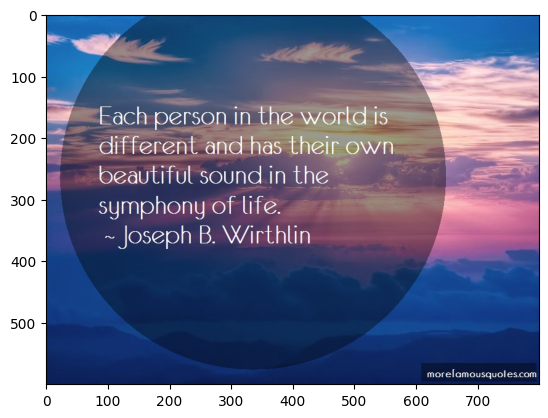

Caption: each person in the world is different


In [174]:
index=549  #79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

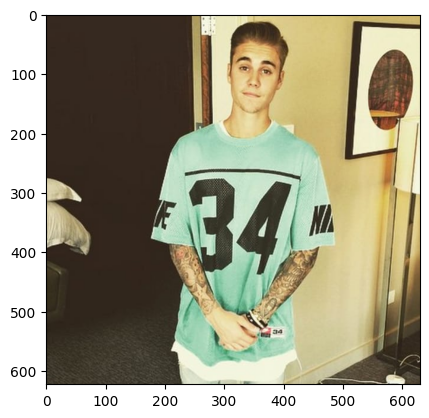

Caption: public at festival


In [175]:
index=185  #79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

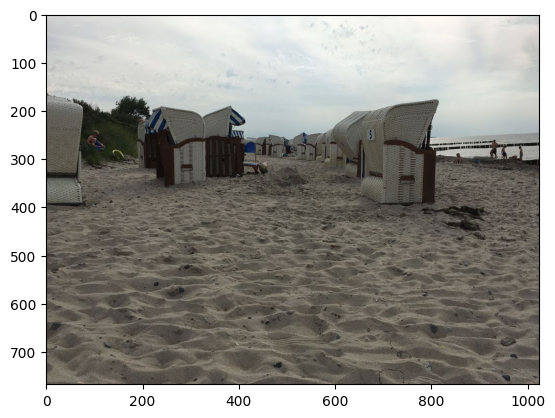

Caption: like this make it so many people are


In [176]:
index=287 #79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

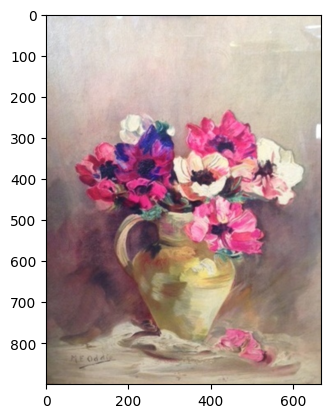

Caption: person th century on still life of flowers in a left


In [177]:
index=79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

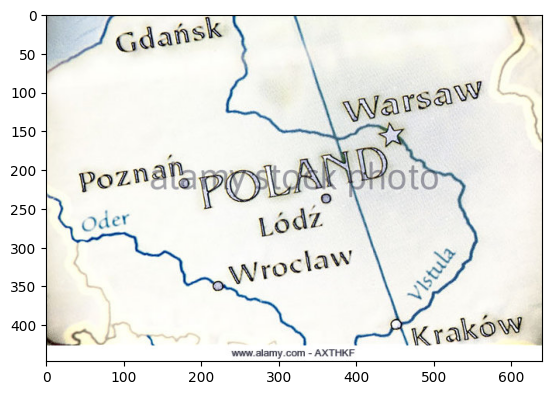

Caption: set drawing style this is i love his work


In [179]:
index=1500
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('image_captioning/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))

### 5. Results and Evaluation
####  Metrics
Common metrics for evaluating image captioning:
- **BLEU Score**: Measures overlap between generated and ground-truth captions.
- **CIDEr**: Focuses on consensus in human-annotated captions.
- **ROUGE**: Measures n-gram overlap.
- **METEOR**: Considers synonyms and stemming for semantic matching.

### 6. Challenges
- Handling missing or unsupported image formats.
- Balancing vocabulary size while retaining caption diversity.
- Training efficiency with large datasets.

### 7. Future Work
- **GANs for Image Captioning**:
  - Explore adversarial training to improve caption quality.
  
- **Attention Mechanism**:
  - Implement attention to focus on specific image regions for better word generation.

- **Transformer Models**:
  - Experiment with Vision Transformers (ViT) or integrate pre-trained language models (e.g., GPT, BERT).

---

### 8. Conclusion
This project demonstrates how pre-trained models like InceptionV3 and GloVe can be used effectively for image captioning. The model successfully generates captions, although there is room for improvement in diversity and accuracy. Future work can incorporate GANs, attention mechanisms, or transformer architectures to enhance the system further.
